# Project: Car Price Prediction

## Objective:

We want to understand the factors on which the pricing of cars depend and reevaluate their prices in the market. Since the pricing of a car depends on several factors, we intend to use Linear Regression and come up with the best suitable model for predicting car prices for future. We also intend to include various visualization techniques to break down complicated information and make it more understandable.
We hope this report would better insight to our clients on various aspects of the cars such as Prices, Engines, Fuel systems, Speed etc.

## Target Data:

We are using the dataset on car price prediction, available on
Kaggle [https://www.kaggle.com/hellbuoy/car-price-prediction].

## Step 1 - Read data and explore rows

First let's import the libraries we'll need.

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from statsmodels.formula.api import ols

%matplotlib inline

In [4]:
# Create variables to store filenames to read.
car_data = './data/car.csv'

In [5]:
# Read the car data
car_df = pd.read_csv(car_data, parse_dates=True )

In [6]:
# structure of car dataframe
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
#Data exploration: summary
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
car_df.shape

(205, 26)

In [9]:
#No missing value
car_df.isnull().head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
# First ten lines of car dataframe
car_df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


## Step 2 - Data Cleaning

#### Remove 'car_ID' column

In [11]:
car_df = car_df.drop(['car_ID'], axis=1)

In [12]:
car_df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

#### Change the 'CarName' Remove all character after space

In [13]:
# new data frame with split value columns 

car_df['CarName']= car_df['CarName'].str.split(" ", n = 1, expand = True)
#car_df['CarName']
all_cars = car_df.groupby(['CarName'], as_index=False).count()
print(all_cars['CarName'])

0          Nissan
1     alfa-romero
2            audi
3             bmw
4           buick
5       chevrolet
6           dodge
7           honda
8           isuzu
9          jaguar
10          maxda
11          mazda
12        mercury
13     mitsubishi
14         nissan
15        peugeot
16       plymouth
17       porcshce
18        porsche
19        renault
20           saab
21         subaru
22         toyota
23        toyouta
24      vokswagen
25     volkswagen
26          volvo
27             vw
Name: CarName, dtype: object


#### Car names lists have some duplicates like tyouta, maxda, vw, nissan andd porcshce.

In [14]:
car_df['CarName'] = car_df['CarName'].replace(['nissan'],'Nissan')
car_df['CarName'] = car_df['CarName'].replace(['porcshce'],'porsche')
car_df['CarName'] = car_df['CarName'].replace(['toyouta'],'toyota')
car_df['CarName'] = car_df['CarName'].replace(['maxda'],'mazda')
car_df['CarName'] = car_df['CarName'].replace(['vw','vokswagen'],'volkswagen')

In [15]:
all_cars = car_df.groupby(['CarName'], as_index=False).count()
print(all_cars['CarName'])

0          Nissan
1     alfa-romero
2            audi
3             bmw
4           buick
5       chevrolet
6           dodge
7           honda
8           isuzu
9          jaguar
10          mazda
11        mercury
12     mitsubishi
13        peugeot
14       plymouth
15        porsche
16        renault
17           saab
18         subaru
19         toyota
20     volkswagen
21          volvo
Name: CarName, dtype: object


### Encoding categorical data

In [16]:
car_df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [17]:
car_df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [18]:
car_df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [19]:
car_df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [20]:
#Find and Replace

new_cols = {"doornumber":     {"four": 4, "two": 2},
            "cylindernumber": {"four": 4, "six": 6, "five": 5, "eight": 8, "two": 2, "twelve": 12, "three":3 }}

In [21]:
car_df = car_df.replace(new_cols)

In [22]:
#Data encoding - regression with categorical variables

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
car_df["CarName"] = ord_enc.fit_transform(car_df[["CarName"]])
car_df["drivewheel"] = ord_enc.fit_transform(car_df[["drivewheel"]])
car_df["carbody"] = ord_enc.fit_transform(car_df[["carbody"]])
car_df["aspiration"] = ord_enc.fit_transform(car_df[["aspiration"]])
car_df["fueltype"] = ord_enc.fit_transform(car_df[["fueltype"]])
car_df["enginetype"] = ord_enc.fit_transform(car_df[["enginetype"]])

car_df[["CarName","drivewheel","carbody","aspiration","fueltype","enginetype"]].head()

,CarName,drivewheel,carbody,aspiration,fueltype,enginetype
0,1.0,2.0,0.0,0.0,1.0,0.0
1,1.0,2.0,0.0,0.0,1.0,0.0
2,1.0,2.0,2.0,0.0,1.0,5.0
3,2.0,1.0,3.0,0.0,1.0,3.0
4,2.0,0.0,3.0,0.0,1.0,3.0


In [23]:
car_df.dtypes

symboling             int64
CarName             float64
fueltype            float64
aspiration          float64
doornumber            int64
carbody             float64
drivewheel          float64
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype          float64
cylindernumber        int64
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [24]:
car_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1.0,1.0,0.0,2,0.0,2.0,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1.0,1.0,0.0,2,0.0,2.0,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1.0,1.0,0.0,2,2.0,2.0,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,2.0,1.0,0.0,4,3.0,1.0,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,2.0,1.0,0.0,4,3.0,0.0,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Step 3 - Exploratory Data Analysis

#### Correlation of Independent Variables with the Dependent Variable

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.098541,0.194311,-0.059866,-0.664073,-0.596135,-0.041671,-0.531954,-0.357612,-0.232919,...,-0.113129,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
CarName,-0.098541,1.000000,-0.065597,0.060091,0.143542,0.053781,-0.007548,0.061688,0.057615,-0.033914,...,-0.226903,-0.157652,0.201519,-0.201044,0.086201,-0.091439,-0.143058,0.053777,0.055715,-0.173728
fueltype,0.194311,-0.065597,1.000000,-0.401397,-0.191491,-0.147853,-0.132257,-0.308346,-0.212679,-0.233880,...,0.024544,-0.069594,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,-0.059866,0.060091,-0.401397,1.000000,0.031792,0.063028,0.066465,0.257611,0.234539,0.300567,...,-0.047972,0.108217,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.664073,0.143542,-0.191491,0.031792,1.000000,0.680358,-0.098954,0.447357,0.398568,0.207168,...,-0.016009,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
carbody,-0.596135,0.053781,-0.147853,0.063028,0.680358,1.000000,-0.155745,0.401362,0.334433,0.131710,...,-0.041925,-0.073352,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,-0.041671,-0.007548,-0.132257,0.066465,-0.098954,-0.155745,1.000000,0.459745,0.485649,0.470751,...,0.314006,0.524307,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
wheelbase,-0.531954,0.061688,-0.308346,0.257611,0.447357,0.401362,0.459745,1.000000,0.874587,0.795144,...,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.057615,-0.212679,0.234539,0.398568,0.334433,0.485649,0.874587,1.000000,0.841118,...,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,-0.033914,-0.233880,0.300567,0.207168,0.131710,0.470751,0.795144,0.841118,1.000000,...,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325


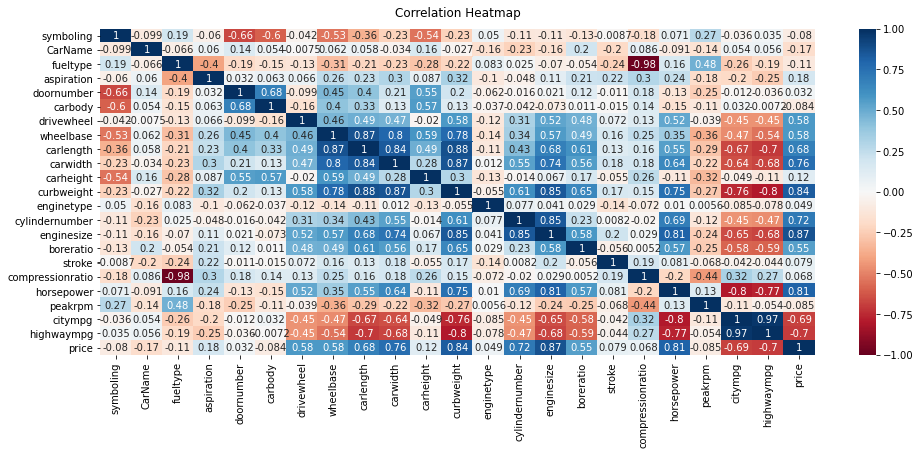

In [25]:
## Checking for Multi-Collinearity-calculate correlation matrix
corr = car_df.corr()

#display the correlation matrix
display(corr)

#plot the heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap = 'RdBu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#sns.heatmap(corr);

In [26]:
car_df.corr()[['price']].sort_values(by='price', ascending=False)

,price
price,1.000000
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
carwidth,0.759325
cylindernumber,0.718305
carlength,0.682920
drivewheel,0.577992
wheelbase,0.577816
boreratio,0.553173


<AxesSubplot:xlabel='drivewheel', ylabel='price'>

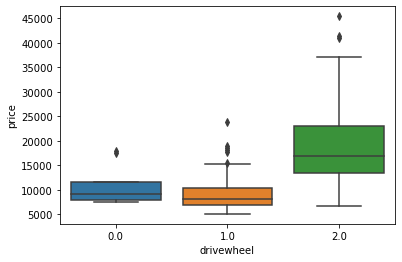

In [27]:
sns.boxplot(y = 'price', x= 'drivewheel', data=car_df)

<AxesSubplot:xlabel='cylindernumber', ylabel='price'>

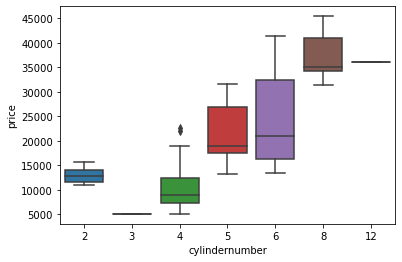

In [28]:
sns.boxplot(y = 'price', x= 'cylindernumber', data=car_df)

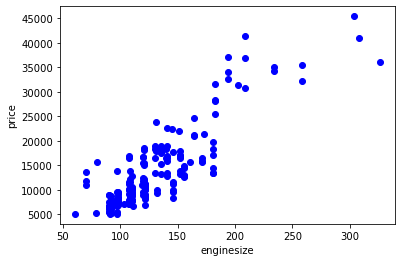

In [29]:
plt.scatter(car_df["enginesize"], car_df["price"], color='blue')
plt.xlabel("enginesize")
plt.ylabel("price")
plt.show()

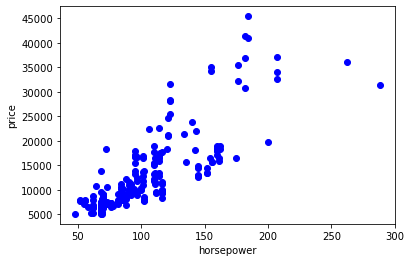

In [30]:
plt.scatter(car_df["horsepower"], car_df["price"], color='blue')
plt.xlabel("horsepower")
plt.ylabel("price")
plt.show()

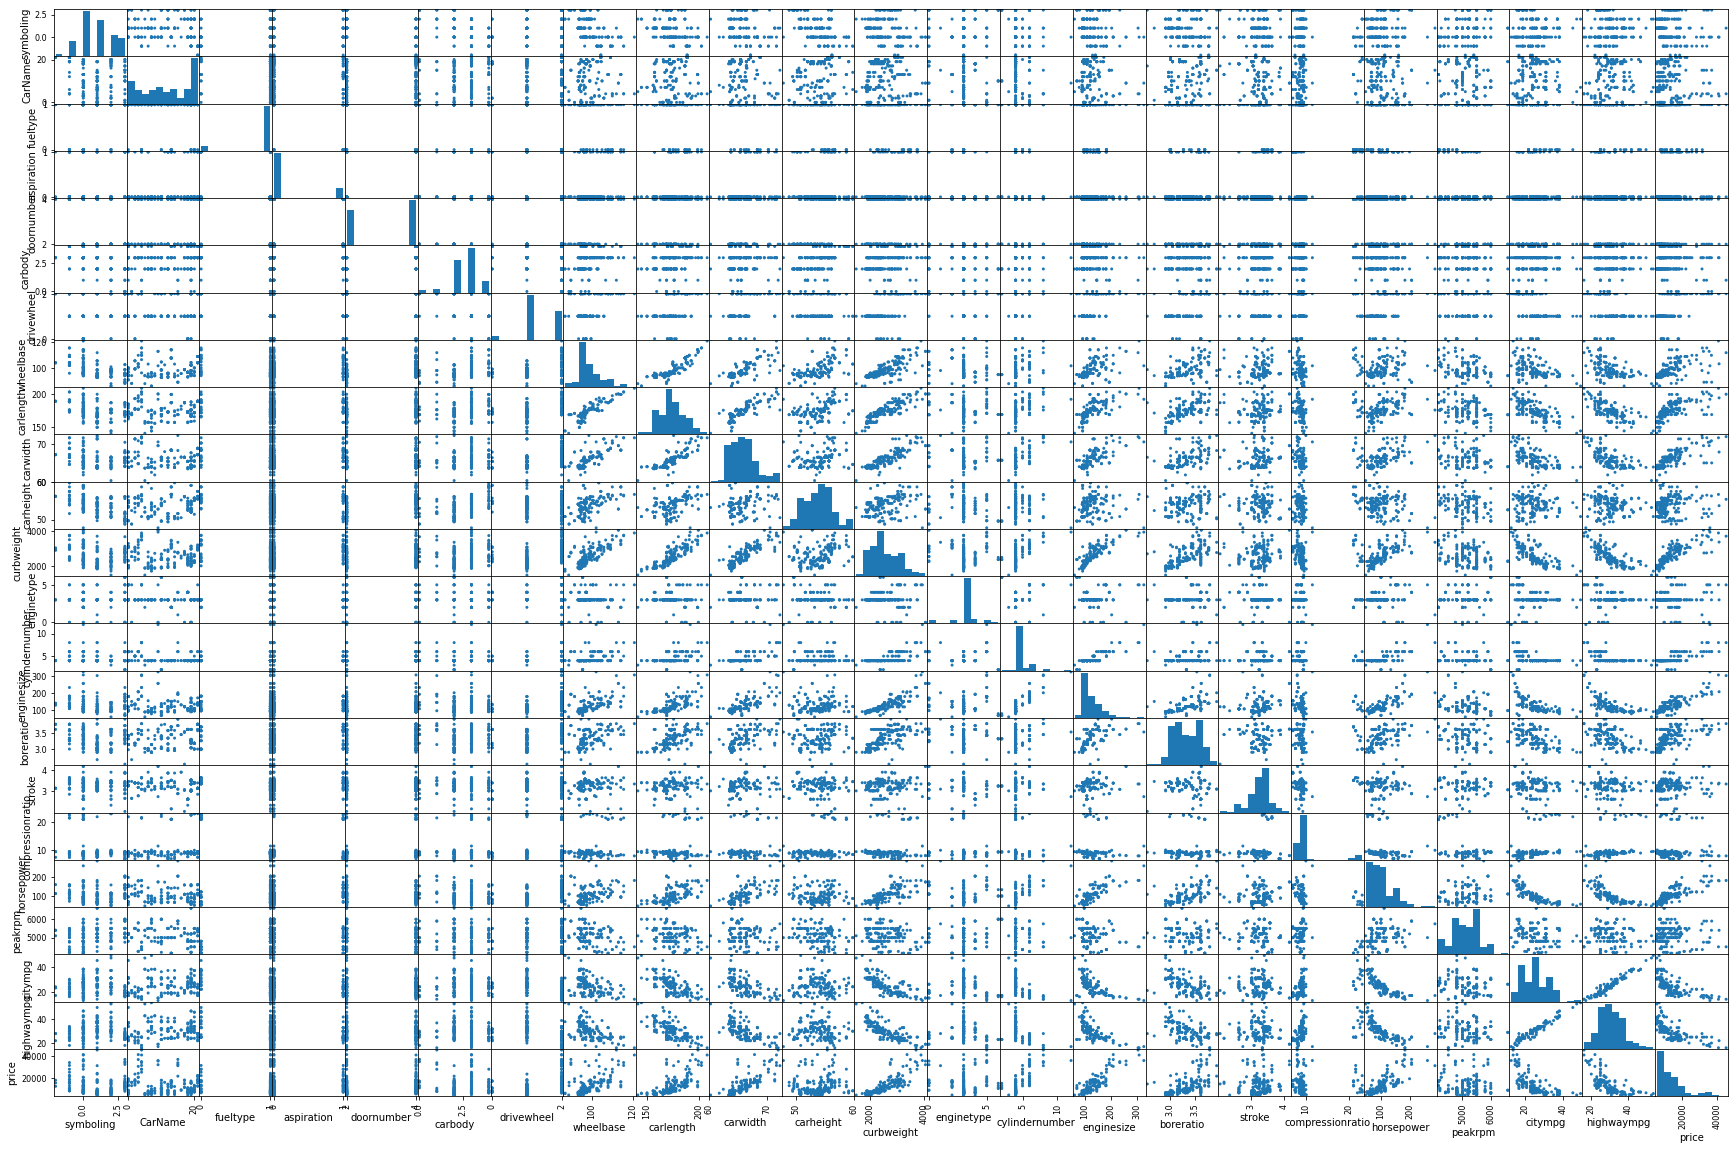

In [31]:
# define the plot

pd.plotting.scatter_matrix(car_df, alpha = 1, figsize = (30, 20))

# show the plot
plt.show()

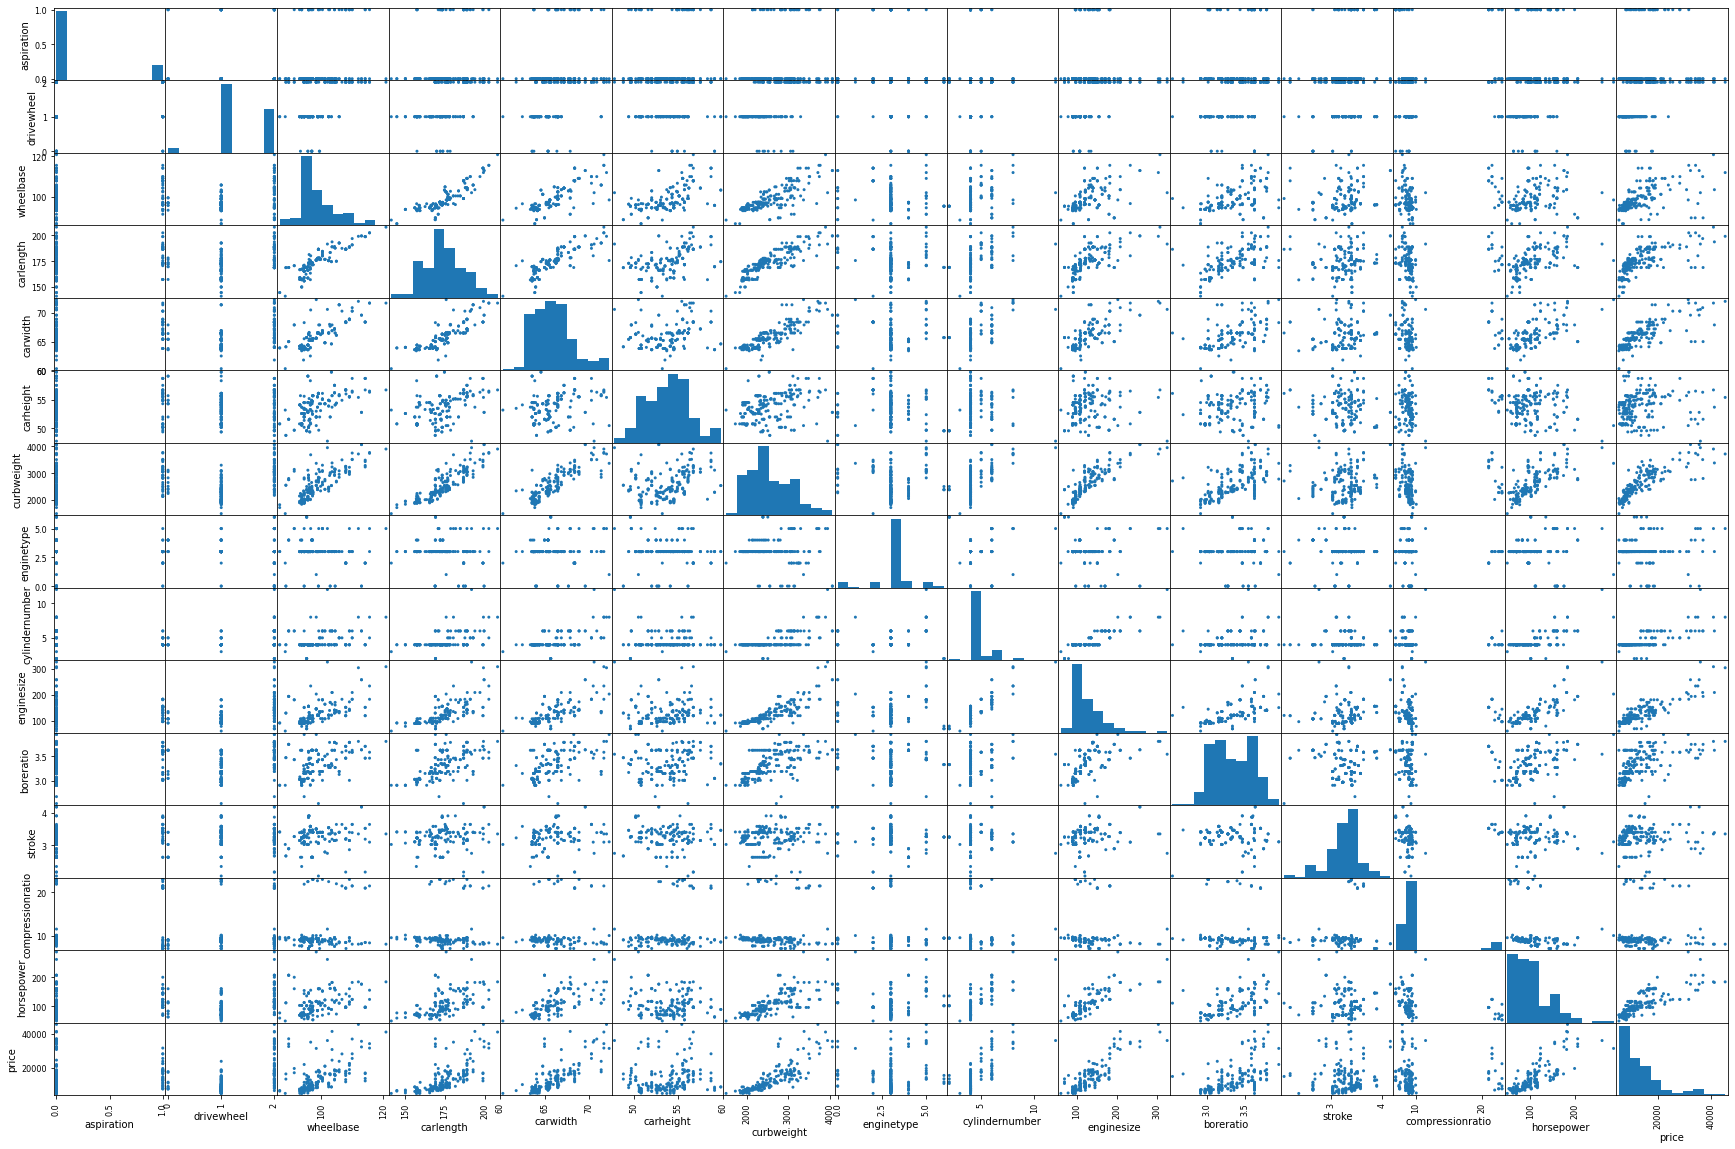

In [32]:
car_df = car_df.drop(['carbody','doornumber','symboling','peakrpm','CarName','citympg','highwaympg', 'fueltype', 'enginelocation', 'fuelsystem'], axis = 1)

pd.plotting.scatter_matrix(car_df, alpha = 1, figsize = (30, 20))

# show the plot
plt.show()

In [33]:
car_df.head()

,aspiration,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,price
0,0.0,2.0,88.6,168.8,64.1,48.8,2548,0.0,4,130,3.47,2.68,9.0,111,13495.0
1,0.0,2.0,88.6,168.8,64.1,48.8,2548,0.0,4,130,3.47,2.68,9.0,111,16500.0
2,0.0,2.0,94.5,171.2,65.5,52.4,2823,5.0,6,152,2.68,3.47,9.0,154,16500.0
3,0.0,1.0,99.8,176.6,66.2,54.3,2337,3.0,4,109,3.19,3.40,10.0,102,13950.0
4,0.0,0.0,99.4,176.6,66.4,54.3,2824,3.0,5,136,3.19,3.40,8.0,115,17450.0


C:\Users\jalpa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

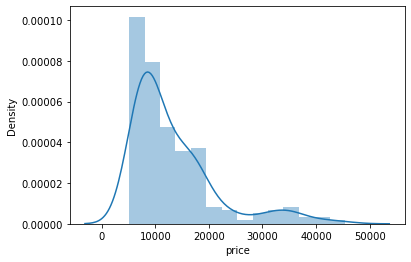

In [34]:
# Distribution of Output Variable
sns.distplot(car_df['price'])

In [35]:
car_df.head()

,aspiration,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,price
0,0.0,2.0,88.6,168.8,64.1,48.8,2548,0.0,4,130,3.47,2.68,9.0,111,13495.0
1,0.0,2.0,88.6,168.8,64.1,48.8,2548,0.0,4,130,3.47,2.68,9.0,111,16500.0
2,0.0,2.0,94.5,171.2,65.5,52.4,2823,5.0,6,152,2.68,3.47,9.0,154,16500.0
3,0.0,1.0,99.8,176.6,66.2,54.3,2337,3.0,4,109,3.19,3.40,10.0,102,13950.0
4,0.0,0.0,99.4,176.6,66.4,54.3,2824,3.0,5,136,3.19,3.40,8.0,115,17450.0


## Step 4 - Build the Models, Evaluate the model and Plot the results

#### Advanced Linear Regression With statsmodels

In [36]:
# Model 1

#fit simple linear regression model
model1 = ols('price ~ enginesize', data=car_df).fit()
res1 = model1.resid

#view model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     657.6
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           1.35e-65
Time:                        15:44:08   Log-Likelihood:                -1984.4
No. Observations:                 205   AIC:                             3973.
Df Residuals:                     203   BIC:                             3979.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8005.4455    873.221     -9.168      0.0

<AxesSubplot:>

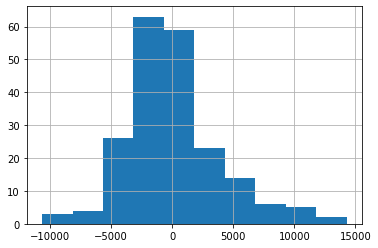

In [37]:
res1.hist()

In [38]:
# Model 2

#fit multi linear regression model
model2 = ols('price ~ enginesize + horsepower', data=car_df).fit()
res2 = model2.resid

#view model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     387.7
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           6.93e-70
Time:                        15:44:09   Log-Likelihood:                -1970.9
No. Observations:                 205   AIC:                             3948.
Df Residuals:                     202   BIC:                             3958.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8389.7331    822.532    -10.200      0.0

<AxesSubplot:>

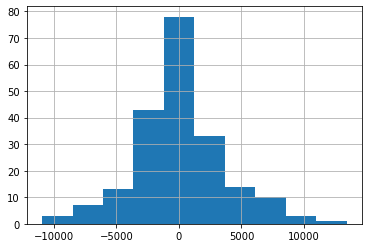

In [39]:
res2.hist()

In [40]:
# Model 3

model3 = ols('price ~ enginesize  + horsepower + wheelbase + carlength + carwidth + curbweight', data=car_df).fit()
res3 = model3.resid

#view model summary
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     151.4
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           3.57e-71
Time:                        15:44:10   Log-Likelihood:                -1956.1
No. Observations:                 205   AIC:                             3926.
Df Residuals:                     198   BIC:                             3949.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.516e+04   1.29e+04     -3.512      0.0

<AxesSubplot:>

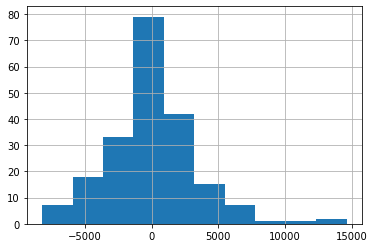

In [41]:
res3.hist()

In [42]:
# Model 4

#fit simple linear regression model
model4 = ols('price ~ enginesize + wheelbase + carlength + carwidth + curbweight + horsepower + cylindernumber + boreratio', data=car_df).fit()
res4 = model4.resid

#view model summary
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     113.1
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           3.33e-69
Time:                        15:44:10   Log-Likelihood:                -1955.6
No. Observations:                 205   AIC:                             3929.
Df Residuals:                     196   BIC:                             3959.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4.161e+04   1.34e+04     -3.

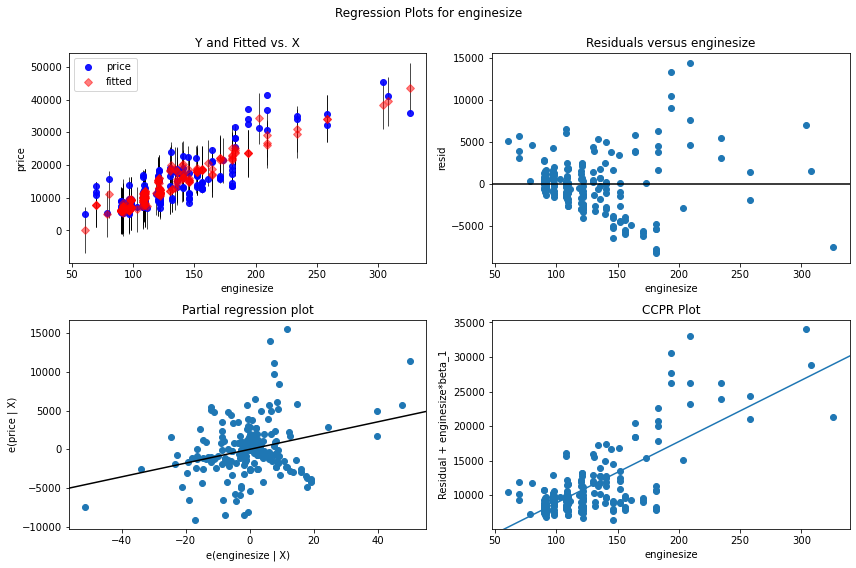

In [43]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model4, 'enginesize', fig=fig)

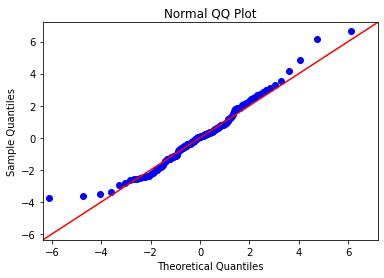

In [44]:
# Q-Q plot for this dataset,
fig = sm.qqplot(res4, stats.t, fit=True, line="45")
plt.title('Normal QQ Plot')
plt.show()

<AxesSubplot:>

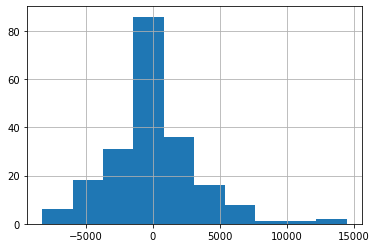

In [45]:
res4.hist()

In [48]:
# Model 5

#fit simple linear regression model
model5 = ols('price ~ enginesize + wheelbase + carlength + carwidth + curbweight + horsepower + cylindernumber + boreratio + drivewheel + carheight + compressionratio + stroke + aspiration + enginetype', data=car_df).fit()
res5 = model5.resid

#view model summary
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     78.83
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           3.59e-71
Time:                        15:44:55   Log-Likelihood:                -1935.9
No. Observations:                 205   AIC:                             3902.
Df Residuals:                     190   BIC:                             3952.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.443e+04   1.46e+04  

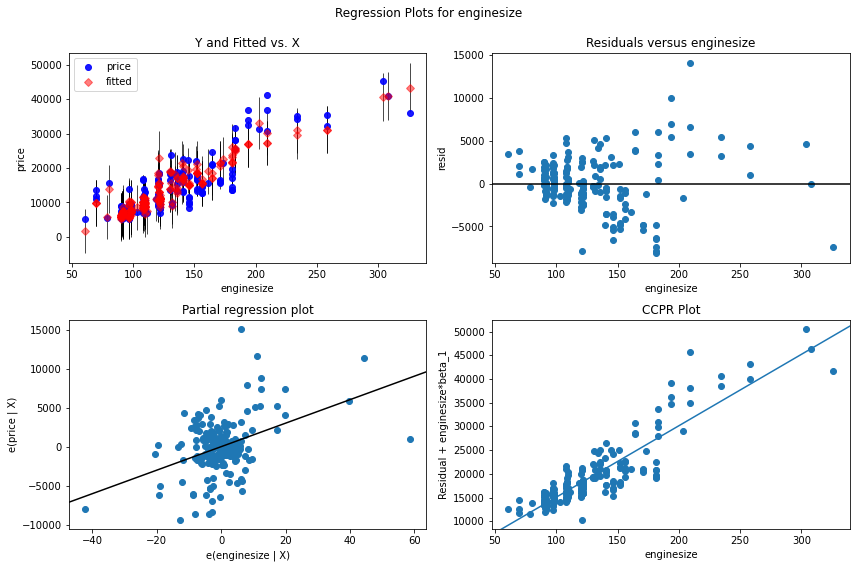

In [49]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model5, 'enginesize', fig=fig)

In [51]:
yactual = car_df['price']
print(yactual)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


In [52]:
ypred = model5.predict()
print(ypred)

[13909.4711279  13909.4711279  21300.29743837 11190.50164527
 12844.89412101 13267.22707077 17199.27357896 17247.99913545
 18774.31156278 15710.13078938 11625.19392974 11625.19392974
 17180.32069851 17204.68347676 18581.79876024 27275.41753145
 27178.25421517 30226.85181047  1716.83433833  6367.36843838
  6180.93098442  5728.69004398  5726.82763827  7854.42367517
  5705.89078274  5715.63589404  5715.63589404  7821.08395072
 11369.02178866 15330.71690634  5736.51253807  7084.41543113
  5791.09161794  7468.57729292  7475.66464659  7178.7085605
  8650.09749659  8900.19436589  8923.67122493  8625.18508992
  6540.9315445   9842.70608906  9824.59260058  7365.11926811
  6367.36843838  6382.87202454 10992.52353236 31199.33148378
 31199.33148378 43430.22976744  6972.91501799  6977.34461404
  6979.55941206  6461.0895173   6168.90815137  9773.78045887
  9773.78045887  9775.99525689 13931.45001067 10353.79191393
 10916.08151987 10353.79191393 10916.08151987 12028.41856749
 10922.72591394 16091.023

<Figure size 864x864 with 0 Axes>

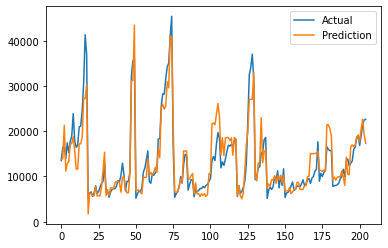

In [57]:
fig, ax = plt.subplots()
ax.plot(yactual, label="Actual")
ax.plot(ypred, label="Prediction")
ax.legend(loc="best")

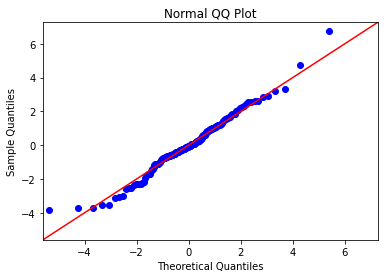

In [54]:
# Q-Q plot for this dataset,
fig = sm.qqplot(res5, stats.t, fit=True, line="45")
plt.title('Normal QQ Plot')
plt.show()

<AxesSubplot:>

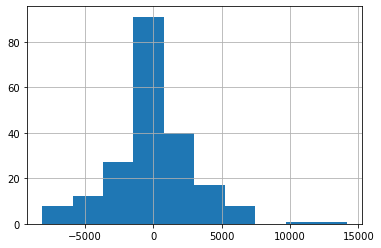

In [55]:
res5.hist()

### Observations:

We get 85% r2 score. Top 14 features that effect on price are:
enginesize, 
wheelbase, 
carlength, 
carwidth, 
horsepower, 
curbweight,
cylindernumber,
boreratio,
drivewheel,
carheight,
compressionratio,
stroke,
aspiration,
enginetype.
